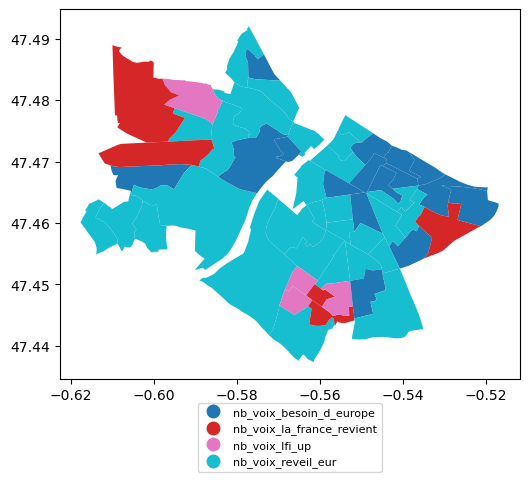

In [39]:
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Load the data
with open('../data/elections-europeennes-angers-2024.json', 'r') as f:
    data = json.load(f)
gdfs = []
for bureau in data:
    # Create a DataFrame
    if(bureau["geo_shape"] == None):
        break
    df = pd.DataFrame(bureau)

    # Exclude non-voting columns
    non_voting_columns = ['nom_lieu_vote', 'bureau_vote', 'inscrits', 'abstentions', 'votants', 'votants_emargement', 'blancs', 'nuls', 'exprimes', 'nb_listes', 'geo_shape', 'geo_point_2d']
    voting_columns = df.columns.difference(non_voting_columns)

    # Now you can find the party with the most votes in each bureau
    df['max_voted_party'] = df[voting_columns].idxmax(axis=1).properties
    # Convert the 'geo_shape' column from JSON to a Shapely geometry
    geometry = Polygon(df["geo_shape"]["geometry"]["coordinates"][0])
    bureau["max_voted_party"] = df["max_voted_party"].properties
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(
                    [bureau],  # Pass the df as a list to create a single-row GeoDataFrame
                    geometry=[geometry],  # Pass the geometry as a list
                    crs="EPSG:4326",
                )   
    gdfs.append(gdf)

# Create a figure and axes
fig, ax = plt.subplots(1, 1)
gdfs_concat = pd.concat(gdfs)
# Plot the GeoDataFrame, coloring by the 'max_voted_party' column
gdfs_concat.plot(column='max_voted_party', ax=ax, legend=True, legend_kwds={'bbox_to_anchor': (0.5, -0.05), 'loc': 'upper center', 'fontsize': 8})

# Show the plot
plt.show()